### Practical Implementation of Data Classification Using Random Forest Algorithm.

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [33]:
# 1. Load the dataset
df = pd.read_csv("rainfall.csv")

In [39]:
# 2. Encode months to numbers
le = LabelEncoder()
df['Month_Code'] = le.fit_transform(df['Month'])

# 3. Categorize rainfall into Low, Medium, High
df['Rainfall_Category'] = df['Rainfall_mm'].apply(lambda x: 'Low' if x < 800 else ('Medium' if x < 1000 else 'High'))

# 4. Encode categories
df['Category_Label'] = le.fit_transform(df['Rainfall_Category'])

In [40]:
# 5. Features and Labels
X = df[['Month_Code']]
y = df['Category_Label']

# 6. Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [37]:
# 7. Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# 8. Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.25

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      0.50      0.50         2

    accuracy                           0.25         4
   macro avg       0.17      0.17      0.17         4
weighted avg       0.25      0.25      0.25         4



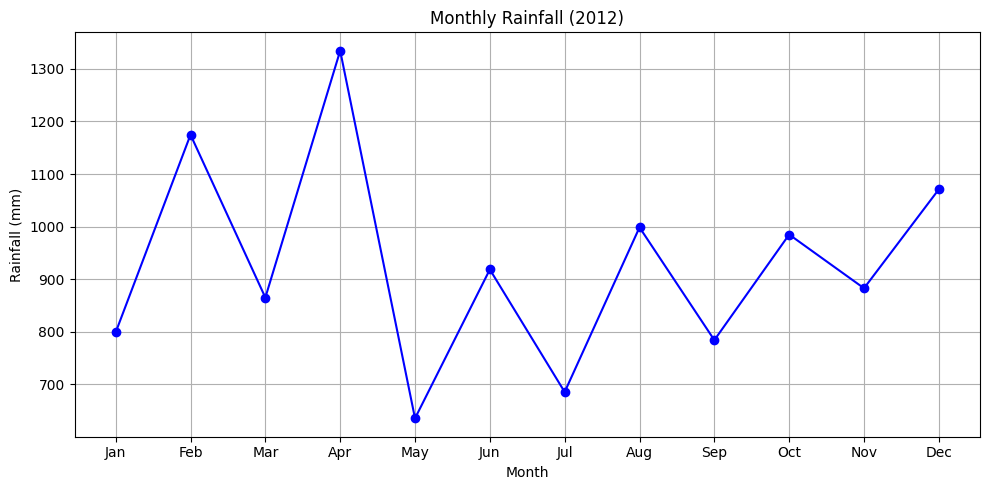

In [36]:
# 9. Line chart visualization (like the image)
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Rainfall_mm'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Rainfall (2012)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()